## Generation of pipe rule
Radius je 200

Imamo pocetno stanje sa pocetnom tockom na 0,0 i zadnjom tockom na 2009.3136, 179.6797

Onda user doda tocku na 620.4731	252.7895
Aplikacija bi trebala naci novu tocku na 709.3561	267.1206 koja odgovara uvjetu da izlazna tangeta ide prema zavrsnoj tocki.

User onda doda tocku na 794.0050	583.5817 i aplikacija treba sada naci izlaznu tangentu prema zanjoj tocki na 1085.0302	703.1979, a treba i prethodnu tangentu (u tocki 709.3561	267.1206) koja je gledala na zadnju tocku, a sada gleda na userovu tocku preracunati u tocku 737.4699	383.5997. 

I tako dalje dok ne dobijemo krajnje stanje. Sa zelenom bojom su oznacene tocke koje user postavi, a sa plavom koje program treba izracunati. 

<img src="Screenshot 2020-02-11 12.53.43.png">


Ovo bi trebalo izracunati analiticki i/ili pomocu D3js https://www.d3-graph-gallery.com/graph/shape.html 

Ako se izracuna analiticki treba se prikazatu u D3js pomocu d3.line() i d3.arc() 

Ako se izracuna u D3 trebaju se vratiti pozicije tocaka.

U D3 treba blokirati da se postavlja tocka koja bi 

Na oba nacina dodati 4 tocke na svaki luk u pravinom razmaku radi provjere.

Na slijedecoj slici su upute:

<img src="Screenshot 2020-02-11 12.58.29.png">

In [75]:
fileName = "pipe rule_169af607d.logout.csv"
df = pd.read_csv(fileName)
col_l = ["BLUE", "RED", "DARKGRAY", "GREEN", "PURPLE"]
col=0
lines=[]
for l in df.Handle.unique():
    _df = df[df["Handle"]==l]

    if _df.iloc[0].X > 0:
        i=len(_df)
        for index, row in _df.iterrows():
            _df.loc[index,"No"]=i
            i-=1

    _df.sort_values(["X"], inplace=True)
    x=_df.iloc[0].X
    y=_df.iloc[0].Y

# zbog ovog dobijem neki warring
    _df.X=_df.X-x
    _df.Y=_df.Y-y
    lines.append((LineString([Point(p) for p in list(zip(_df.X,_df.Y))]), col_l[col]))
    col+=1
    _df["Case"]=len(_df)/2
    for index, row in _df.iterrows():
            df.loc[index,"X"]=row.X
            df.loc[index,"Y"]=row.Y
            df.loc[index,"Case"]=row.Case
            df.loc[index,"No"]=row.No

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [85]:
df.sort_values(["Case", "No"], inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df

,Handle,Layer Name,Layer Type,Block name,Block rotation,No,Wtf,X,Y,Z,Case
0,41e,0,LINE,NaN,NaN,1,to,0.0000,0.0000,0.0,1.0
1,41e,0,LINE,NaN,NaN,2,from,2009.3136,179.6797,0.0,1.0
2,518,0,LWPOLYLINE,NaN,NaN,1,at,0.0000,0.0000,0.0,2.0
3,518,0,LWPOLYLINE,NaN,NaN,2,at,620.4731,252.7895,0.0,2.0
4,518,0,LWPOLYLINE,NaN,NaN,3,at,709.3561,267.1206,0.0,2.0
5,518,0,LWPOLYLINE,NaN,NaN,4,at,2009.3136,179.6797,0.0,2.0
6,516,0,LWPOLYLINE,NaN,NaN,1,at,0.0000,0.0000,0.0,3.0
7,516,0,LWPOLYLINE,NaN,NaN,2,at,620.4731,252.7895,0.0,3.0
8,516,0,LWPOLYLINE,NaN,NaN,3,at,737.4699,383.5997,0.0,3.0
9,516,0,LWPOLYLINE,NaN,NaN,4,at,794.0050,583.5817,0.0,3.0


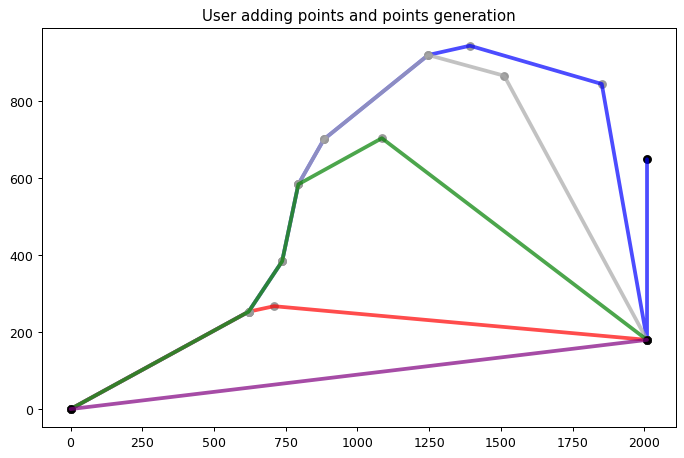

In [89]:
TMPPLOT(lines,"User adding points and points generation")

In [86]:
def TMPPLOT(lines,title=""):
    SIZE = (20, 20)
    col_l = ["BLUE", "RED", "DARKGRAY", "GREEN"]
    fig = pyplot.figure(1, figsize=SIZE, dpi=90)
    ax = fig.add_subplot(321)
    ax.set_title(title)
    for _line, col in lines:
#         print(col)
        plot_coords(ax, _line)
        plot_bounds(ax, _line)
        plot_line(ax, _line, alpha=0.7, color=col)
    pyplot.show()

In [92]:
import pandas as pd
from shapely.geometry import Point, Polygon, LineString
from matplotlib import pyplot
from shapely.figures import SIZE, set_limits, plot_coords, plot_bounds, plot_line, plot_line_issimple
from wand.image import Image as WImage